In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import train_test_split



df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [15]:
# Sélectionner les caractéristiques pour l'ACP
features = df.drop('target', axis=1)

# Effectuer une préparation des données en normalisant les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Effectuer l'ACP pour réduire la dimensionnalité des données
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

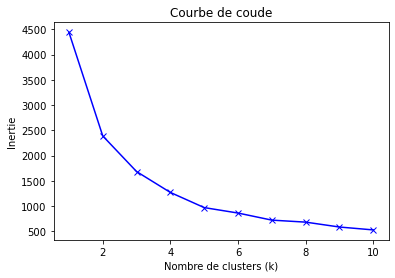

In [16]:
# Calculer l'inertie pour différentes valeurs de k
inertias = []
k_values = range(1, 11)  # Tester de 1 à 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertias.append(kmeans.inertia_)

# Afficher la courbe de coude
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Courbe de coude')
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Sélectionner les caractéristiques pour le clustering
features = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Effectuer le clustering avec k-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# Obtenir les étiquettes de cluster pour chaque échantillon
cluster_labels = kmeans.labels_

# Afficher les étiquettes de cluster pour les premiers échantillons
print(cluster_labels[:10])

[1 1 1 1 0 1 0 0 1 0]


In [19]:
yhat=kmeans.predict(X_test)
metrics.accuracy_score(y_test, yhat)



0.5756097560975609